In [ ]:
from bs4 import BeautifulSoup as bs
import requests

In [ ]:
link = 'https://www.amazon.in/product-reviews/B0BJMGXLYZ/'

In [ ]:
page = requests.get(link)

In [ ]:
page

<Response [200]>

In [ ]:
soup = bs(page.content , 'html.parser')
print(soup.prettify())

<!DOCTYPE doctype html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in">
 <!-- sp:feature:head-start -->
 <head>
  <script>
   var aPageStart = (new Date()).getTime();
  </script>
  <meta charset="utf-8"/>
  <!-- sp:end-feature:head-start -->
  <!-- sp:feature:csm:head-open-part1 -->
  <!-- sp:end-feature:csm:head-open-part1 -->
  <!-- sp:feature:cs-optimization -->
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
  <link href="https://m.media-amazon.com" rel="dns-prefetch"/>
  <link href="https://completion.amazon.com" rel="dns-prefetch"/>
  <!-- sp:end-feature:cs-optimization -->
  <!-- sp:feature:csm:head-open-part2 -->
  <!-- sp:end-feature:csm:head-open-part2 -->
  <!-- sp:feature:aui-assets -->
  <link href="https://m.media-amazon.com/images/I/11EIQ5IGqaL._RC|01ZTHTZObnL.css,41C-I1lXVwL.css,31ufSReDtSL.css,013z33uKh2L.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L.css,

In [ ]:
names = soup.find_all('span' , class_ = 'a-profile-name')
names

[<span class="a-profile-name">saurabh kumar</span>,
 <span class="a-profile-name">ananth</span>,
 <span class="a-profile-name">saurabh kumar</span>,
 <span class="a-profile-name">saurabh kumar</span>,
 <span class="a-profile-name">Jaseel Yoonus</span>,
 <span class="a-profile-name">Yogesh</span>,
 <span class="a-profile-name">Amit patil</span>,
 <span class="a-profile-name">Gopi Kumar</span>,
 <span class="a-profile-name">Sameer Phad</span>,
 <span class="a-profile-name">ananth</span>,
 <span class="a-profile-name">RB</span>,
 <span class="a-profile-name">Anand Kumar Singh</span>,
 <span class="a-profile-name">Sangeeta</span>]

In [ ]:
cust_name = []
for name in names:
  cust_name.append(name.get_text())

print(cust_name)

['saurabh kumar', 'ananth', 'saurabh kumar', 'saurabh kumar', 'Jaseel Yoonus', 'Yogesh', 'Amit patil', 'Gopi Kumar', 'Sameer Phad', 'ananth', 'RB', 'Anand Kumar Singh', 'Sangeeta']


In [ ]:
cust_name.pop(0)
cust_name.pop(0)
print(cust_name)

['saurabh kumar', 'saurabh kumar', 'Jaseel Yoonus', 'Yogesh', 'Amit patil', 'Gopi Kumar', 'Sameer Phad', 'ananth', 'RB', 'Anand Kumar Singh', 'Sangeeta']


In [ ]:
#Remove repetetions of names
cust_name_update = []

for name in cust_name:
  if name not in cust_name_update:
    cust_name_update.append(name)
  else:
    pass

In [ ]:
len(cust_name_update)

10

In [ ]:
title = soup.find_all('a' , class_='review-title')

In [ ]:
review_title = []
for t in title:
  review_title.append(t.get_text().strip('\n'))

In [ ]:
print(review_title)

['Working very smooth', 'Legit, good product', 'Nice one', 'Awesome', 'Super Fast Delivery', 'iPad is ipad', 'IPad 10th generation with charging issues', 'Excellant product with an intentional flaw', 'Good but not worth it', 'It a a very good product']


In [ ]:
print(len(review_title))

10


In [ ]:
import pandas as pd
df = pd.DataFrame()

In [ ]:
df['name'] = cust_name_update
df['review_title'] = review_title

df

,name,review_title
0,saurabh kumar,Working very smooth
1,Jaseel Yoonus,"Legit, good product"
2,Yogesh,Nice one
3,Amit patil,Awesome
4,Gopi Kumar,Super Fast Delivery
5,Sameer Phad,iPad is ipad
6,ananth,IPad 10th generation with charging issues
7,RB,Excellant product with an intentional flaw
8,Anand Kumar Singh,Good but not worth it
9,Sangeeta,It a a very good product


In [ ]:
ratings = soup.find_all('i' , class_ = 'review-rating')

In [ ]:
rate = []
for r in ratings:
  rate.append(r.get_text().strip('\n'))

In [ ]:
rate.pop(0)
rate.pop(0)

'1.0 out of 5 stars'

In [ ]:
print(rate)

['4.0 out of 5 stars', '4.0 out of 5 stars', '5.0 out of 5 stars', '5.0 out of 5 stars', '5.0 out of 5 stars', '5.0 out of 5 stars', '1.0 out of 5 stars', '3.0 out of 5 stars', '3.0 out of 5 stars', '5.0 out of 5 stars']


In [ ]:
df['ratings'] = rate

In [ ]:
df

,name,review_title,ratings
0,saurabh kumar,Working very smooth,4.0 out of 5 stars
1,Jaseel Yoonus,"Legit, good product",4.0 out of 5 stars
2,Yogesh,Nice one,5.0 out of 5 stars
3,Amit patil,Awesome,5.0 out of 5 stars
4,Gopi Kumar,Super Fast Delivery,5.0 out of 5 stars
5,Sameer Phad,iPad is ipad,5.0 out of 5 stars
6,ananth,IPad 10th generation with charging issues,1.0 out of 5 stars
7,RB,Excellant product with an intentional flaw,3.0 out of 5 stars
8,Anand Kumar Singh,Good but not worth it,3.0 out of 5 stars
9,Sangeeta,It a a very good product,5.0 out of 5 stars


In [ ]:
reviews = soup.find_all('span' , class_ = 'review-text-content')
reviews

[<span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>Using from 2 weeks no issue till now .</span>
 </span>,
 <span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>It’s an iPad guys, so I don’t think there’s anything to comment on. Good product. I was scared about the delivery as this is the first time I’m buying an item so expensive through Amazon, And when I did receive the item, I got really scared when I saw the packing, the box was kindof in a bad shape when I received it. The seal was intact but the packing is subpar because they just give it to you in a tamper proof bag. No Amazon box as such…that’s the only downside. Other than that the product is good.</span>
 </span>,
 <span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>Nice fit to ipad looks good</span>
 </span>,
 <span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>Good ,<br>Go

In [ ]:
review = []
for r in reviews:
  review.append(r.get_text().strip('\n'))

In [ ]:
print(review)

['Using from 2 weeks no issue till now .', 'It’s an iPad guys, so I don’t think there’s anything to comment on. Good product. I was scared about the delivery as this is the first time I’m buying an item so expensive through Amazon, And when I did receive the item, I got really scared when I saw the packing, the box was kindof in a bad shape when I received it. The seal was intact but the packing is subpar because they just give it to you in a tamper proof bag. No Amazon box as such…that’s the only downside. Other than that the product is good.', 'Nice fit to ipad looks good', 'Good ,Good price on Amazon ,Cheaper then regular apple shop', 'Super Fast Delivery  and Excellent packing by Amazon. Fantastic product by Apple.', 'E-sim supported', 'IPad 10th generation recieved on 30th nov 2022 through Amazon. It worked for a day and on 2nd Dec it stopped working and never getting charged with the charger. Got out to Apple Service Center and got delivery report and submitted to Amazon customer

In [ ]:
df['reviews'] = review

In [ ]:
df

,name,review_title,ratings,reviews
0,saurabh kumar,Working very smooth,4.0 out of 5 stars,Using from 2 weeks no issue till now .
1,Jaseel Yoonus,"Legit, good product",4.0 out of 5 stars,"It’s an iPad guys, so I don’t think there’s an..."
2,Yogesh,Nice one,5.0 out of 5 stars,Nice fit to ipad looks good
3,Amit patil,Awesome,5.0 out of 5 stars,"Good ,Good price on Amazon ,Cheaper then regul..."
4,Gopi Kumar,Super Fast Delivery,5.0 out of 5 stars,Super Fast Delivery and Excellent packing by ...
5,Sameer Phad,iPad is ipad,5.0 out of 5 stars,E-sim supported
6,ananth,IPad 10th generation with charging issues,1.0 out of 5 stars,IPad 10th generation recieved on 30th nov 2022...
7,RB,Excellant product with an intentional flaw,3.0 out of 5 stars,Apple has updated the design of the Apple IPad...
8,Anand Kumar Singh,Good but not worth it,3.0 out of 5 stars,There are N number of reasons why I am giving ...
9,Sangeeta,It a a very good product,5.0 out of 5 stars,I like it so much I am using it since 10 days ...


In [ ]:
from textblob import TextBlob

In [ ]:
review_sentiment = []
for rev in df.reviews:
  review_sentiment.append(TextBlob(rev).sentiment.polarity)

In [ ]:
df['review_sentiment'] = review_sentiment

In [ ]:
df

,name,review_title,ratings,reviews,review_sentiment
0,saurabh kumar,Working very smooth,4.0 out of 5 stars,Using from 2 weeks no issue till now .,0.000000
1,Jaseel Yoonus,"Legit, good product",4.0 out of 5 stars,"It’s an iPad guys, so I don’t think there’s an...",0.065625
2,Yogesh,Nice one,5.0 out of 5 stars,Nice fit to ipad looks good,0.566667
3,Amit patil,Awesome,5.0 out of 5 stars,"Good ,Good price on Amazon ,Cheaper then regul...",0.466667
4,Gopi Kumar,Super Fast Delivery,5.0 out of 5 stars,Super Fast Delivery and Excellent packing by ...,0.483333
5,Sameer Phad,iPad is ipad,5.0 out of 5 stars,E-sim supported,0.000000
6,ananth,IPad 10th generation with charging issues,1.0 out of 5 stars,IPad 10th generation recieved on 30th nov 2022...,0.157273
7,RB,Excellant product with an intentional flaw,3.0 out of 5 stars,Apple has updated the design of the Apple IPad...,0.216667
8,Anand Kumar Singh,Good but not worth it,3.0 out of 5 stars,There are N number of reasons why I am giving ...,0.044618
9,Sangeeta,It a a very good product,5.0 out of 5 stars,I like it so much I am using it since 10 days ...,0.440556


In [ ]:
title_sentiment = []
for rev in df.review_title:
  title_sentiment.append(TextBlob(rev).sentiment.polarity)

In [ ]:
df.insert(2,'Title_sentiment' , title_sentiment)

In [ ]:
df

,name,review_title,Title_sentiment,ratings,reviews,review_sentiment
0,saurabh kumar,Working very smooth,0.520000,4.0 out of 5 stars,Using from 2 weeks no issue till now .,0.000000
1,Jaseel Yoonus,"Legit, good product",0.700000,4.0 out of 5 stars,"It’s an iPad guys, so I don’t think there’s an...",0.065625
2,Yogesh,Nice one,0.600000,5.0 out of 5 stars,Nice fit to ipad looks good,0.566667
3,Amit patil,Awesome,1.000000,5.0 out of 5 stars,"Good ,Good price on Amazon ,Cheaper then regul...",0.466667
4,Gopi Kumar,Super Fast Delivery,0.266667,5.0 out of 5 stars,Super Fast Delivery and Excellent packing by ...,0.483333
5,Sameer Phad,iPad is ipad,0.000000,5.0 out of 5 stars,E-sim supported,0.000000
6,ananth,IPad 10th generation with charging issues,0.000000,1.0 out of 5 stars,IPad 10th generation recieved on 30th nov 2022...,0.157273
7,RB,Excellant product with an intentional flaw,0.000000,3.0 out of 5 stars,Apple has updated the design of the Apple IPad...,0.216667
8,Anand Kumar Singh,Good but not worth it,0.275000,3.0 out of 5 stars,There are N number of reasons why I am giving ...,0.044618
9,Sangeeta,It a a very good product,0.910000,5.0 out of 5 stars,I like it so much I am using it since 10 days ...,0.440556


In [ ]:
df[['name','Title_sentiment','review_sentiment']]

,name,Title_sentiment,review_sentiment
0,saurabh kumar,0.520000,0.000000
1,Jaseel Yoonus,0.700000,0.065625
2,Yogesh,0.600000,0.566667
3,Amit patil,1.000000,0.466667
4,Gopi Kumar,0.266667,0.483333
5,Sameer Phad,0.000000,0.000000
6,ananth,0.000000,0.157273
7,RB,0.000000,0.216667
8,Anand Kumar Singh,0.275000,0.044618
9,Sangeeta,0.910000,0.440556


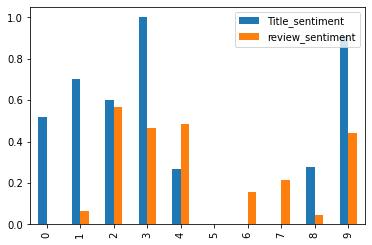

In [ ]:
df[['name','Title_sentiment','review_sentiment']].plot.bar()

In [ ]:
df.to_csv('Apple_tab_reviews.csv')